In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,KFold
import lightgbm as lgb

from sklearn.metrics import roc_curve,auc

train=pd.read_csv("./data/zhengqi_train.txt",sep='\t')# V0-V37, target
test=pd.read_csv("./data/zhengqi_test.txt",sep='\t')

# X_train=np.array(train.drop(['target'], axis = 1))#(2888, 38)
# y_train=np.array(train['target'])#(2888,)
# X_test=np.array(test)#(1925,38)

# 归一化

In [17]:
from sklearn.preprocessing import StandardScaler
train_scale=StandardScaler().fit_transform(train)

# box-cox变换

In [4]:
from scipy import stats

train_boxcox, _ = stats.boxcox(train_scale[:,0])
train_scale

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


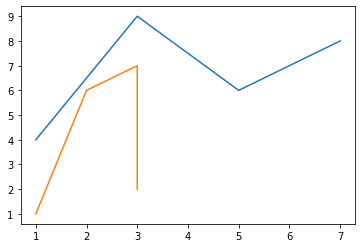

In [22]:
x = [1,3,5,7]
y = [4,9,6,8]
plt.plot(x,y)
x = [1,2,3,3]
y = [1,6,7,2]
plt.plot(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

X_auc=np.r_[X_train,X_test]
y_auc=np.r_[np.zeros(2888),np.ones(1925)]

folds=5
avg_cv_score=0

kf=KFold(n_splits=folds,shuffle=True,random_state=2022)
for i, (train_index,test_index) in enumerate(kf.split(X_auc)):
    lgb=LinearRegression()
    lgb.fit(X_auc[train_index],y_auc[train_index])
    y_pred_lgb=lgb.predict_proba(X_auc[test_index])
    fpr,tpr,thresholds=roc_curve(y_auc[test_index],y_pred_lgb[:,1])
    score=auc(fpr,tpr)
    print("-----sklearn:",score)
    
    avg_cv_score+=score
avg_cv_score/=5
print('avg score=',avg_cv_score)